<h1>KNN in Medical Industry - Study Case</h1>

<p style="font-size:18px">Diabetes is a pathological disorder of the sugar metabolism. The blood sugar level of those affected is permanently high. Over time, this damages the vessels and various organs. That is why it is so important to recognize this disease as early as possible.</p>
<br>
<p style="font-size:18px">The data set is based on studies by the hospital Frankfurt, Germany. The data shows the number of sick people according to diabetes of the pregnant women.</p>
<br>
<p style="font-size:18px">In this tutorial, I will use rescaling method of KNN and will try to improve performance with Robust Scaler.<br>
<p style="font-size:18px">Data avaible on Kaggle: <a href>https://www.kaggle.com/johndasilva/diabetes</a>
<br>
Lizenz: <a href="https://creativecommons.org/publicdomain/zero/1.0/deed.de">CC0-Lizenz<a>
<h2>Attribute Information:</h2>
Pregnacies<br>
Glucose<br>
Blood Pressure<br>
Skin Thickness<br>
Insulin<br>
BMI<br>
DiabetesPedigreeFunction<br>
Age<br>
Outcome (1 and 0)</p>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import RobustScaler

In [2]:
data = pd.read_csv("diabetes.csv")

<h2>1. Check Data</h2>

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


<p style="font-size:18px">Tha data contains nulls. So we have to see, if this make sense</p> 

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [7]:
data["Pregnancies"].value_counts()

1     356
0     301
2     284
3     195
4     191
5     141
6     131
7     100
8      96
9      70
10     54
11     24
12     23
13     22
14      7
17      3
15      2
Name: Pregnancies, dtype: int64

<p style="font-size:18px"1.1 The Columns wich contains value 0 doesnt make a sense.<br> 
Following columns have an invalid zero value:<br>
    - Glucose<br>
    - Blood Pressure<br>
    - Skin Thickness<br>
    - Insulin<br>
    - BMI<br>
<p style="font-size:18px">I intend to replace the zero values with NaN values. Later they will be replaced with suitable values</p>

In [8]:
data_1=data

In [9]:
data_1[
    ["Glucose", 
     "BloodPressure",
     "SkinThickness",
     "Insulin", 
     "BMI"]] = data_1[
    ["Glucose",
     "BloodPressure",
     "SkinThickness", 
     "Insulin", 
     "BMI"]].replace(0, np.NaN)

In [10]:
data_1.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<h2>2. Visualisation of data</h2>

<h3>Visualisation of null values</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE8424DE50>,
      dtype=object)

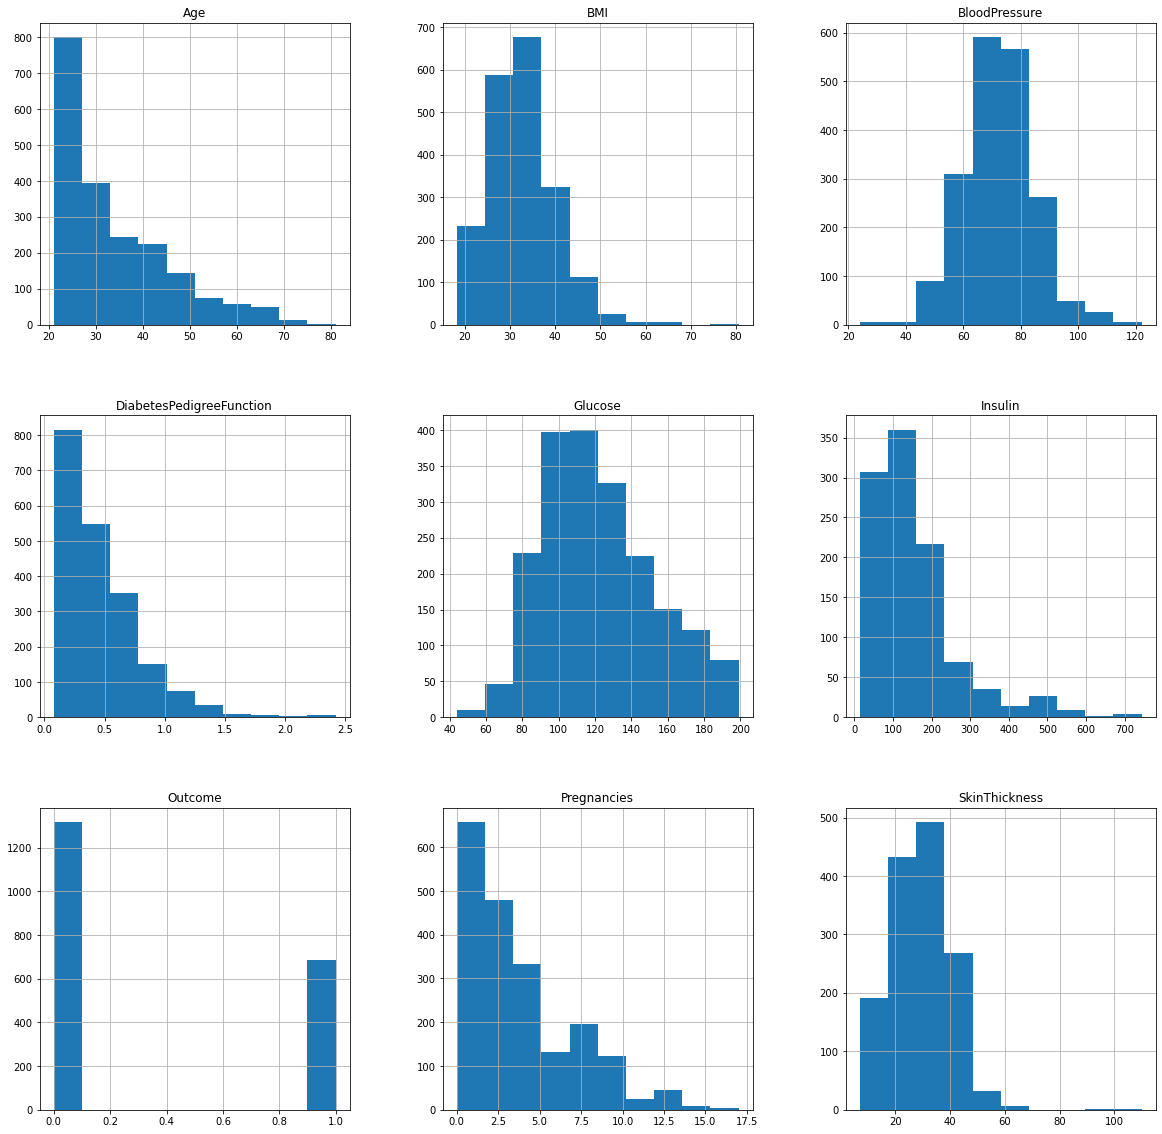

In [11]:
data_1.hist(figsize=(20,20))

<h3>Now i an going to replace the NaNs with mean values</h3>

In [12]:
data_1["Glucose"].fillna(data_1["Glucose"].mean(), inplace = True)
data_1["BloodPressure"].fillna(data_1["BloodPressure"].mean(), inplace = True)
data_1["SkinThickness"].fillna(data_1["SkinThickness"].mean(), inplace = True)
data_1["Insulin"].fillna(data_1["Insulin"].mean(), inplace = True)
data_1["BMI"].fillna(data_1["BMI"].mean(), inplace = True)

<h3>Plotting after cleaning data</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE84ED6490>,
      dtype=object)

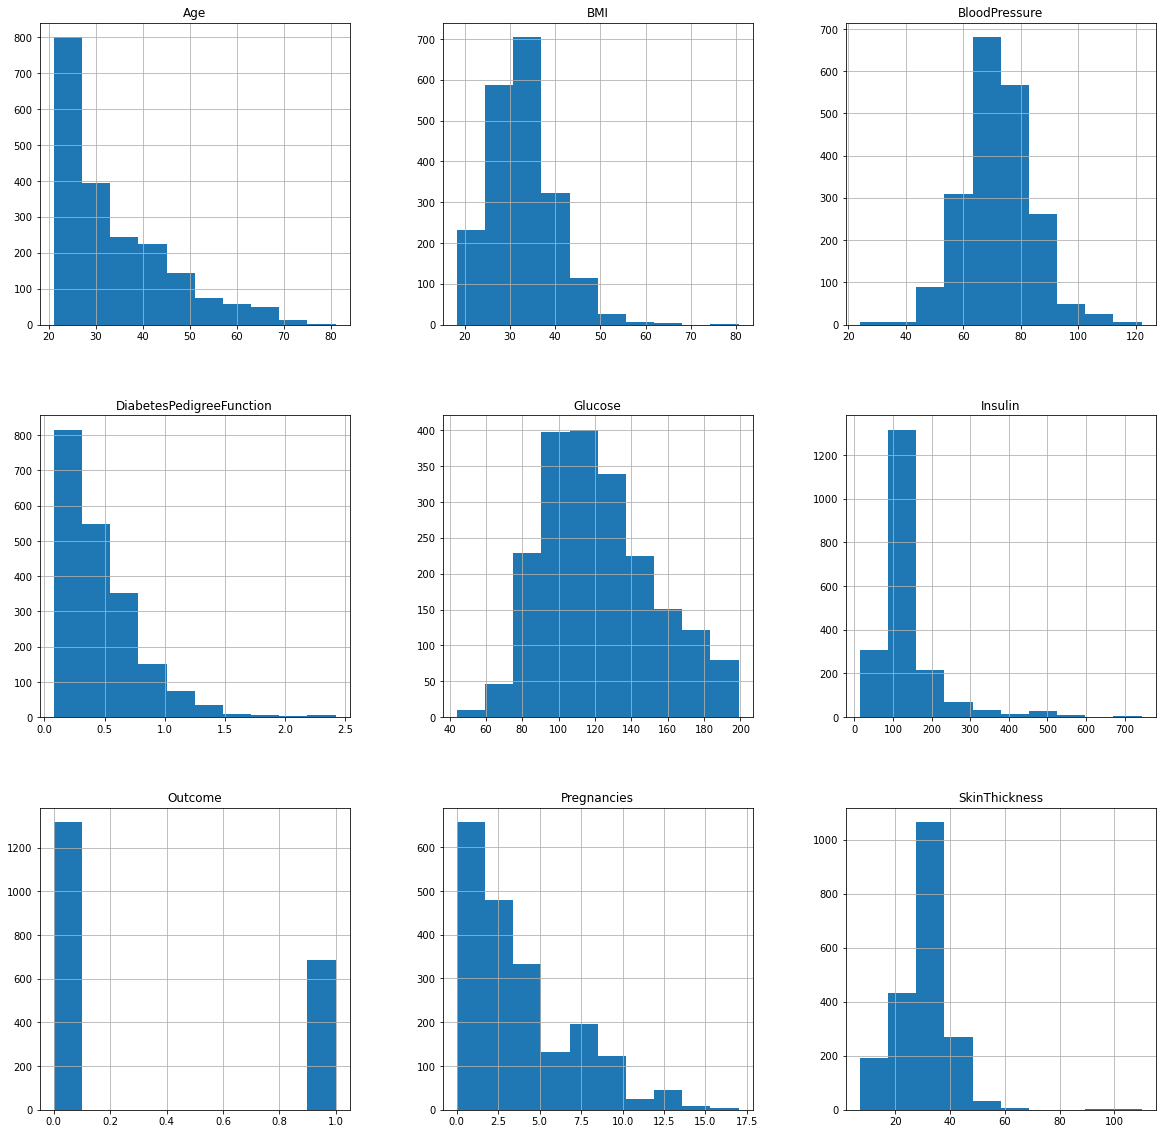

In [13]:
data_1.hist(figsize=(20,20))

<h3>Plotting uncleaned data</h3>

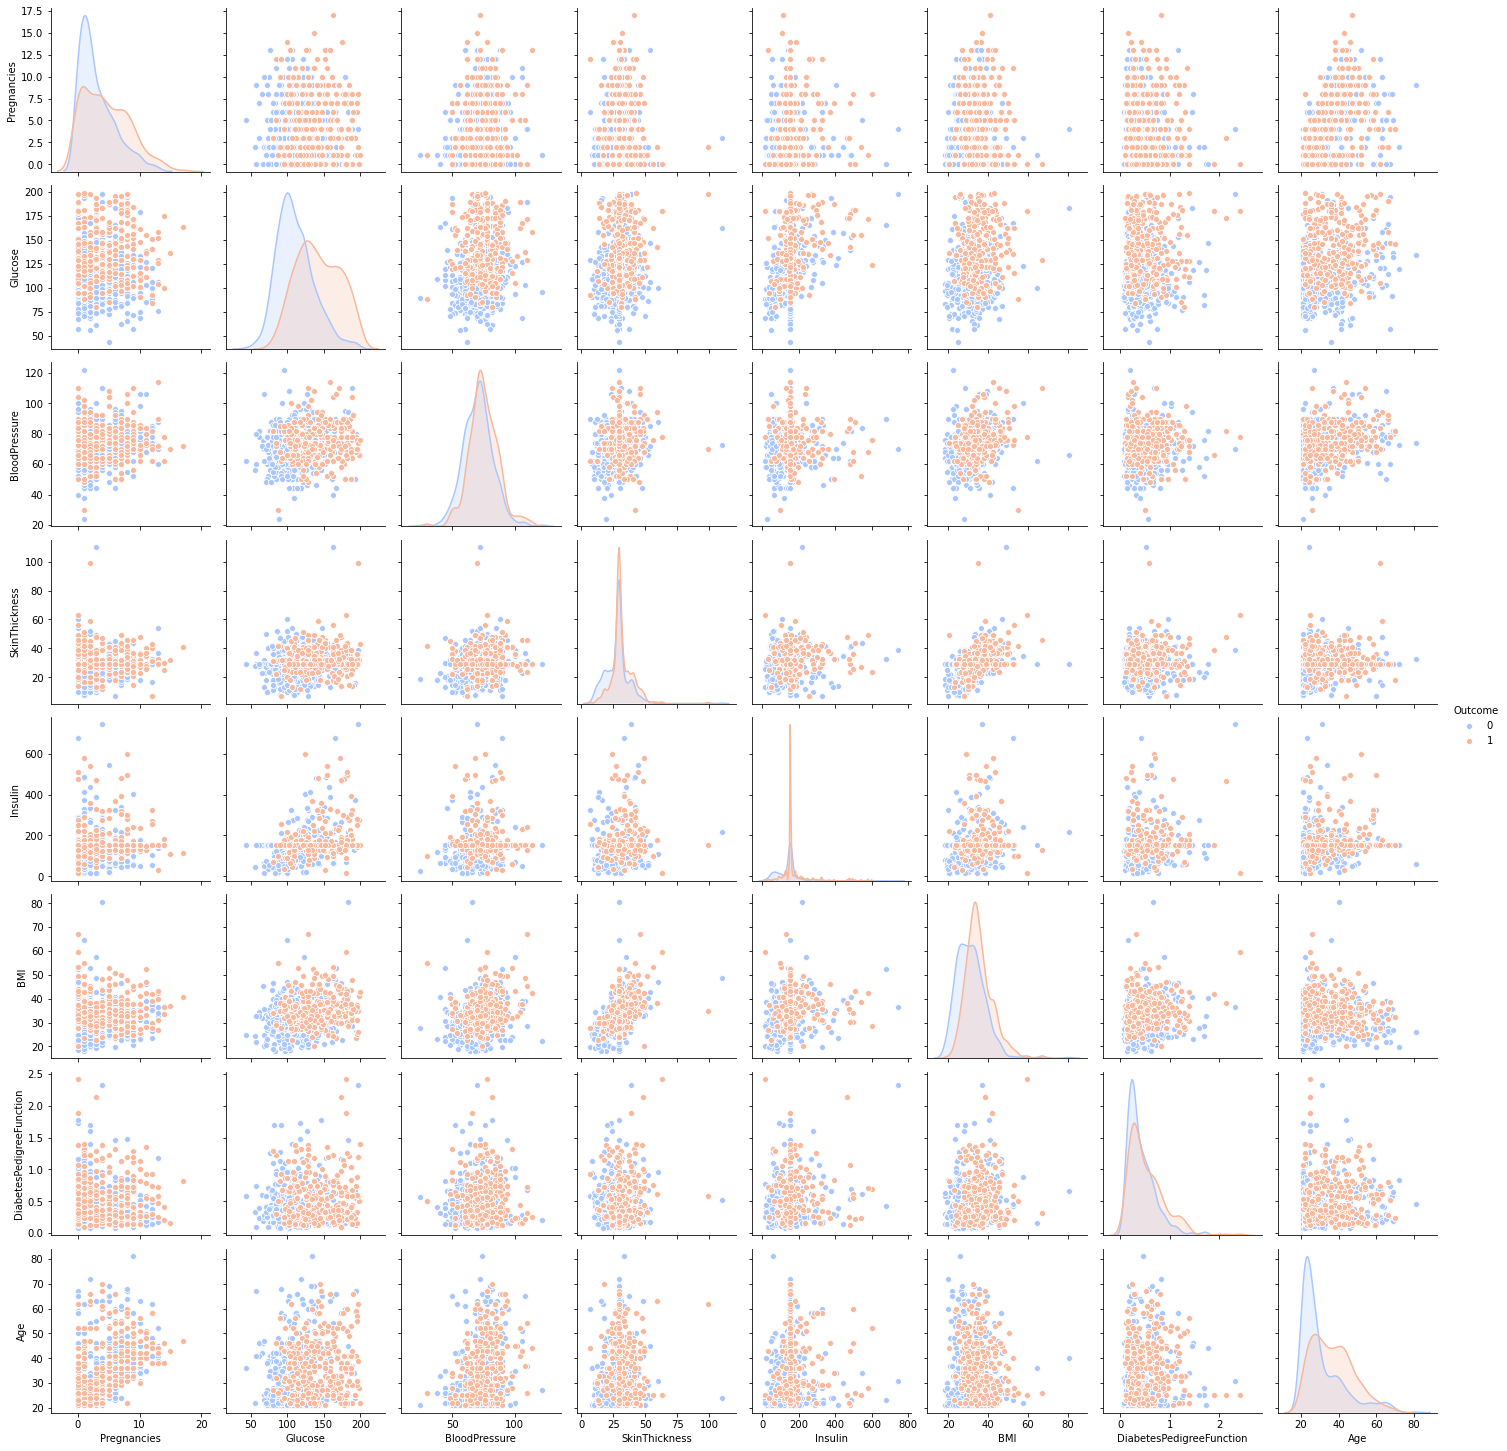

In [14]:
sns.pairplot(data, hue="Outcome", palette="coolwarm")

<h3>Plotting cleaned data</h3>

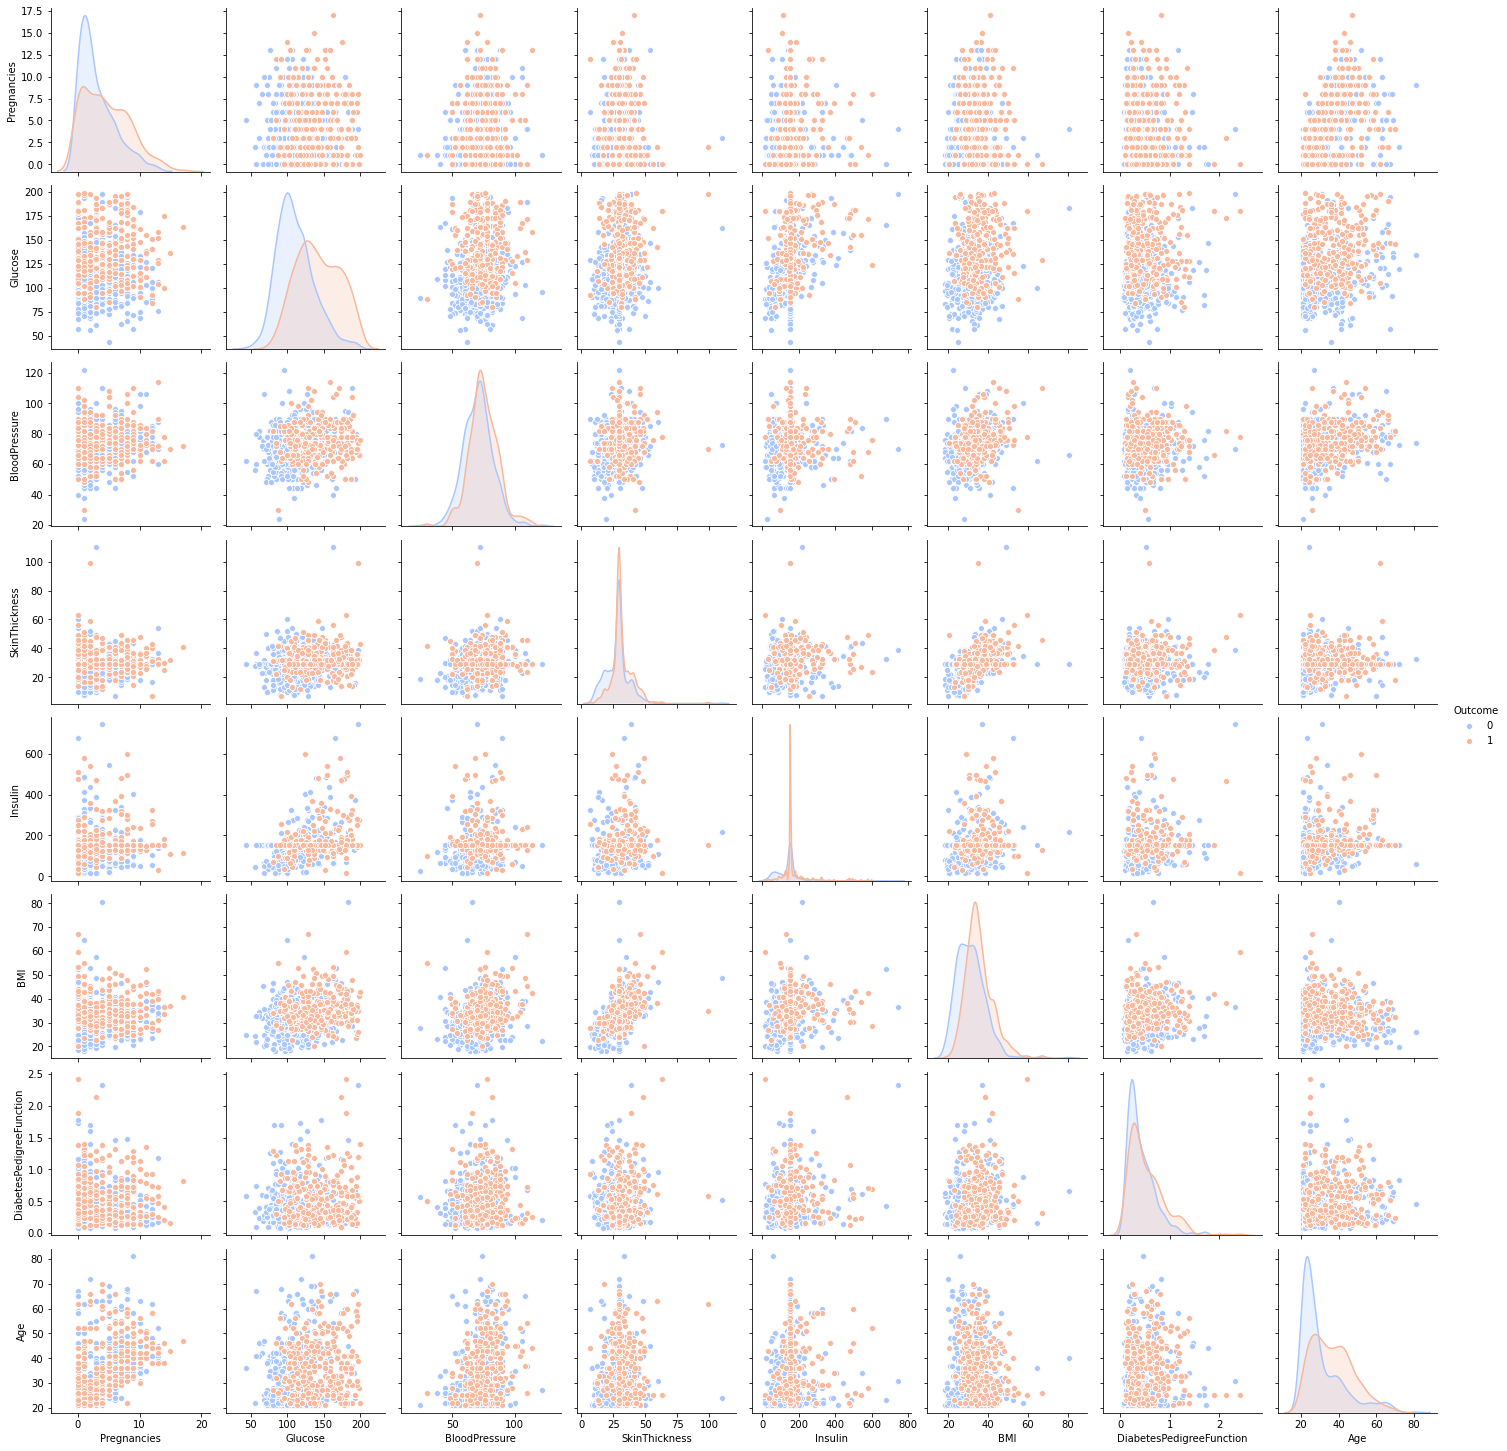

In [15]:
sns.pairplot(data_1, hue="Outcome", palette="coolwarm")

<p style="font-size:18px">Pearson's Correlation Coefficient: helps me find out the relationship between two quantities. It showes the measure of the strength of association between two variables.</br>
<br>
So i can see the relationship between glucose and pregnancies - pregnant women in their younger years and as the number of pregnancies increase get diabetes more often.</br>
In relation to glucose and age - glucose levels in young pregnant women are often high, which is thought to cause diabetes.</p>

<h3>Heatmap</h3>

<p style="font-size:18px">A heat map is a two-dimensional representation of information with the help of colors. Heat map helps me to visualise the information.</p>

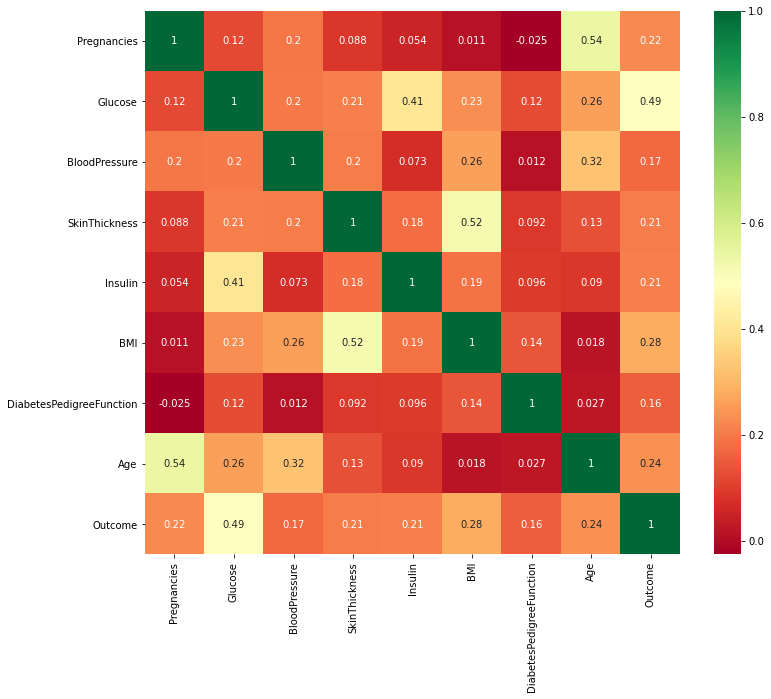

In [16]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(data_1.corr(), annot=True,cmap ='RdYlGn')  

<h2>3. Modelling - Standard Scaler</h2>

In [17]:
# Rescaling features 
scaler=StandardScaler()

In [18]:
scaler.fit(data_1.drop("Outcome", axis=1))

StandardScaler()

In [19]:
scaler_features=scaler.transform(data_1.drop("Outcome", axis=1))

In [20]:
# Converting rescaled data into dataframe
scaler_featured=pd.DataFrame(scaler_features, columns=data_1.columns[:-1])

In [21]:
scaler_featured.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.515394,0.524960,-0.870852,6.203810e-01,-3.536965e-16,0.132144,-1.063246,1.180424
1,-1.120495,-1.244054,0.803273,1.818504e-01,-3.576985e-01,0.772070,-0.735551,-0.856326
2,-1.120495,0.754277,0.000000,3.894934e-16,-3.536965e-16,1.606755,0.491759,-0.177409
3,-1.120495,0.426682,-0.368614,1.387809e+00,1.197875e+00,1.342438,-0.327478,-0.771462
4,-0.817945,0.557720,-0.870852,1.278177e+00,4.060131e+00,1.119855,0.201161,-1.026055


In [22]:
# Create X and y variable
X=scaler_featured.iloc[:,-1]
y=data_1["Outcome"]

In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(scaler_features,data_1["Outcome"],
                                                    test_size=0.30)

<h2>4. Apply KNN Algorithm</h2>

In [24]:
# Create KNN Object
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
# Predictions and evaluation
pred = knn.predict(X_test)

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       398
           1       0.92      0.89      0.90       202

    accuracy                           0.94       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.94      0.94      0.94       600



<p style="font-size:18px">Recall is good. Precision is high too. Accuracy of the modell is 94%.</p>

In [28]:
cnf_matrix = metrics.confusion_matrix(y_test, pred)
cnf_matrix

array([[382,  16],
       [ 22, 180]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

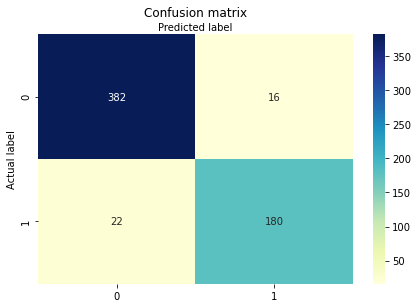

In [29]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h2>5. Choose the K value</h2>

In [30]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

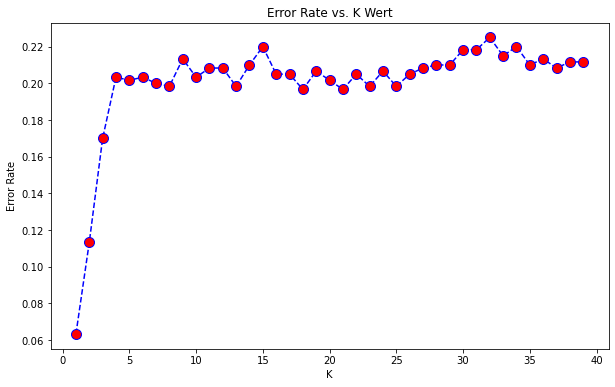

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Wert')
plt.xlabel('K')
plt.ylabel('Error Rate')

<h3>Train again with the new K value.</h3>

In [34]:
# With K5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("With K=5")
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

With K=5


[[346  52]
 [ 69 133]]


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       398
           1       0.72      0.66      0.69       202

    accuracy                           0.80       600
   macro avg       0.78      0.76      0.77       600
weighted avg       0.80      0.80      0.80       600



<p style="font-size:18px">accuracy = 80%</p>

<h3>Explore the Model with Robust Scaler</h3>

In [36]:
scaler = RobustScaler()

In [37]:
features=data_1.drop("Outcome", axis=1)

In [65]:
scaled_features = scaler.fit_transform(data_1.drop('Outcome',axis=1))

In [56]:
X = scaled_features
y=data_1["Outcome"]

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30)

In [58]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
predict = knn.predict(X_test)

In [60]:
print(classification_report (y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       397
           1       0.78      0.66      0.71       203

    accuracy                           0.82       600
   macro avg       0.81      0.78      0.79       600
weighted avg       0.82      0.82      0.82       600



<p style="font-size:18px">accuracy = 82%</p>

In [61]:
cnf_matrix = metrics.confusion_matrix(y_test, predict)
cnf_matrix

array([[360,  37],
       [ 70, 133]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

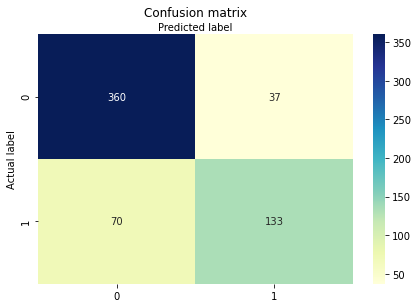

In [62]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<p style="font-size:18px">with robust scaler transforms we got slightly increased results.</p> 